In [7]:
# ------------------------------------------- #
#  Imports                                    #
# ------------------------------------------- #

from character import Character
from src.dice import Dice
from src.aleatory_variable import AleatoryVariable
import matplotlib.pyplot as plt
from src.simulator import CombatModel, RoundModel
plt.style.use('seaborn')


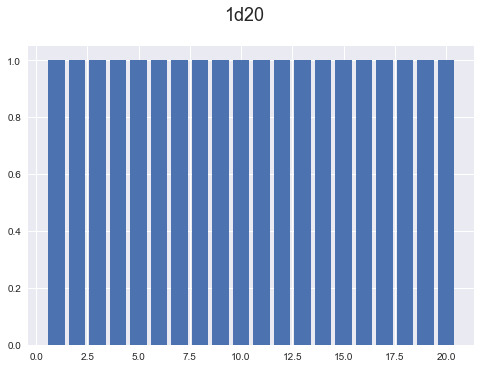

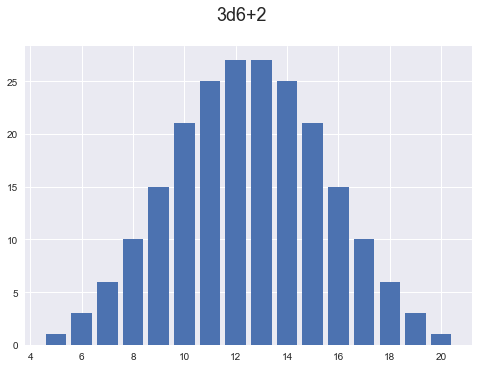

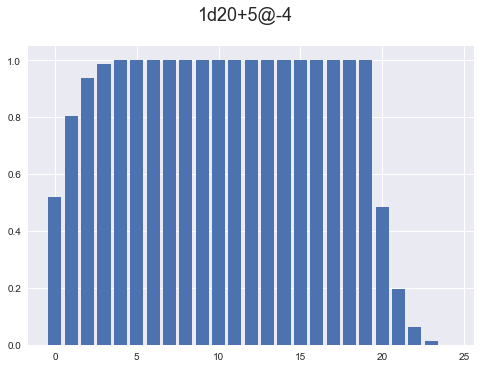

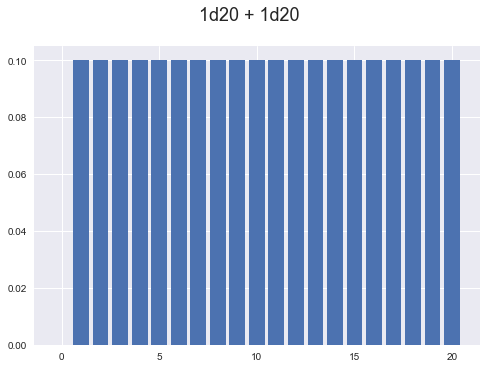

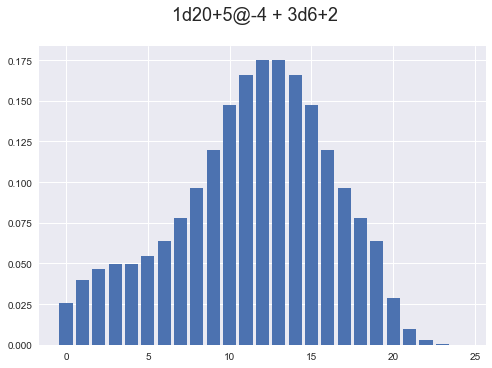

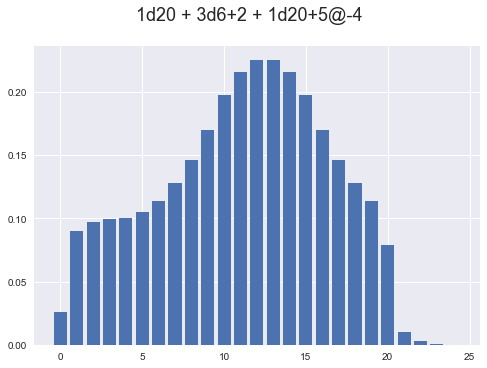

In [8]:
# ------------------------------------------- #
#  Dice examples                              #
# ------------------------------------------- #


d1 = Dice(1, 20)  # 1d20
d2 = Dice(3, 6, +2)  # 3d6 +2
d3 = Dice(1,20, +5, -4) # 2d20 +5 @-4

d1.plot()
d2.plot()
d3.plot()


# Combining dice
d11 = Dice.combine(d1, d1)
d32 = Dice.combine(d3, d2)
d123 = Dice.combine(d1, d2, d3)

d11.plot()
d32.plot()
d123.plot()


In [9]:
# ------------------------------------------- #
#  Character definition                       #
# ------------------------------------------- #

character_1 = Character(health=20, defense=12, attack_dice=Dice(1,20, +1), damage_dice=Dice(1,6))
character_2 = Character(health=15, defense=10, attack_dice=Dice(1,20, -1, 2), damage_dice=Dice(2,6), n_attacks=2)

character_3 = Character(health=25, defense=8, attack_dice=Dice(1,20), damage_dice=Dice(1,6, -1))
character_4 = Character(health=20, defense=9, attack_dice=Dice(1,20, 0, 3), damage_dice=Dice(1,6, +1))

# Factions
a_faction = Character.combine(character_1, character_2)
print("Faction A:  ", a_faction)
b_faction = Character.combine(character_3, character_4)
print("Faction B:  ", b_faction)


Faction A:   Health:35, Defense: 11, Attack dice: 1d20+1 + 1d20-1@2 Damage Dice: 1d6 + 2d6, No. Attacks: 3
Faction B:   Health:45, Defense: 8, Attack dice: 1d20 + 1d20@3 Damage Dice: 1d6-1 + 1d6+1, No. Attacks: 2


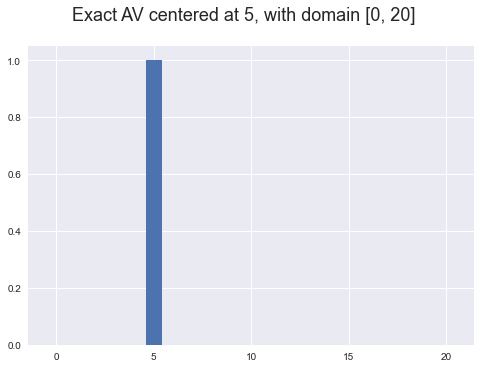

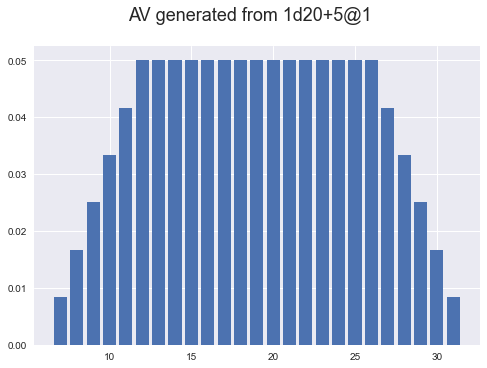

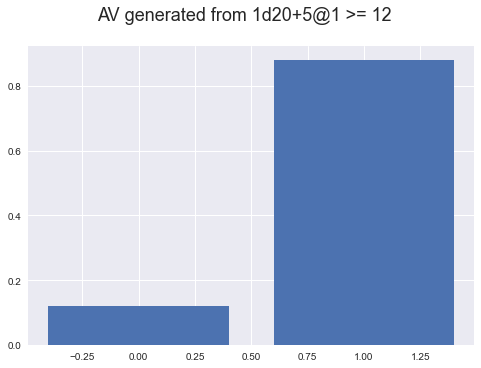

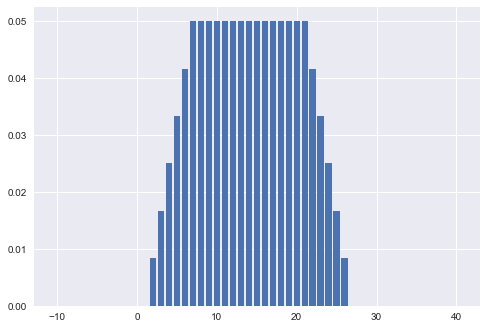

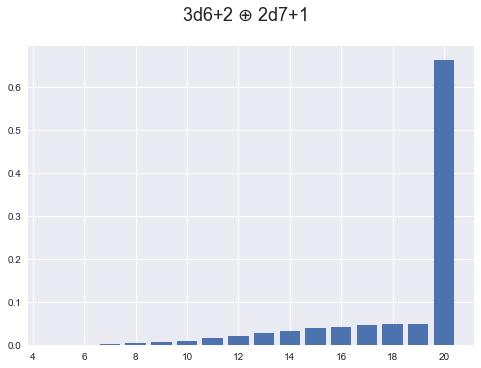

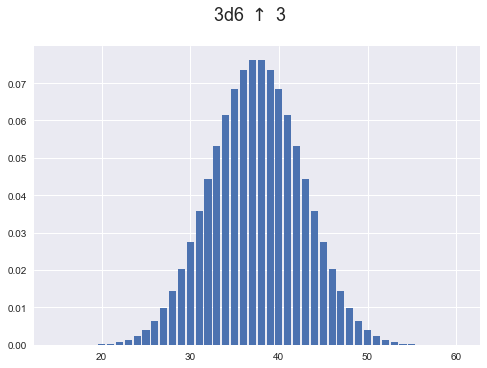

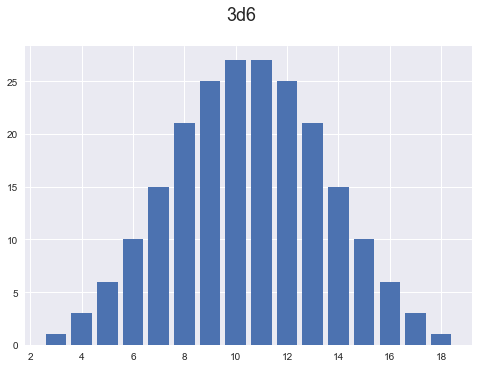

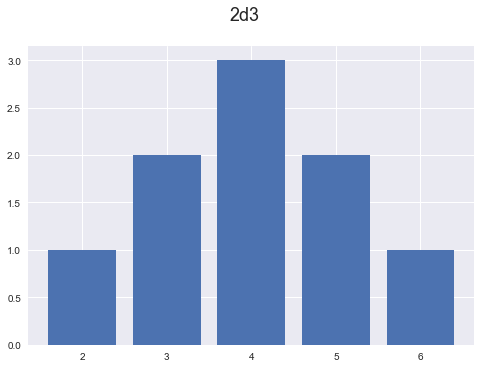

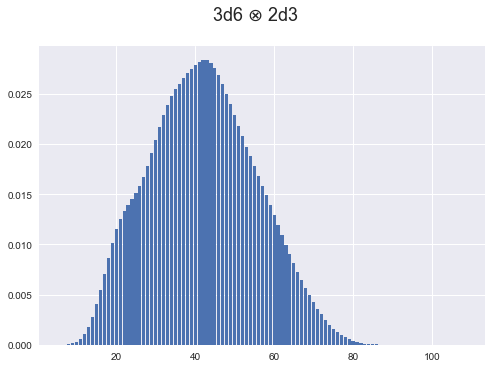

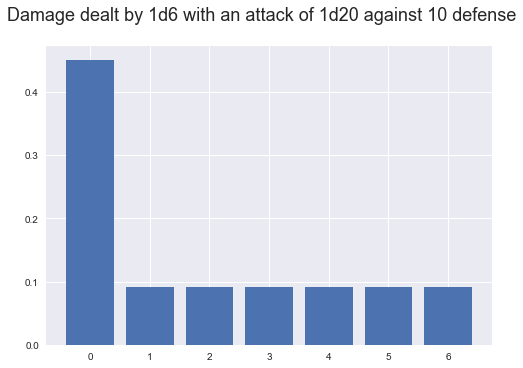

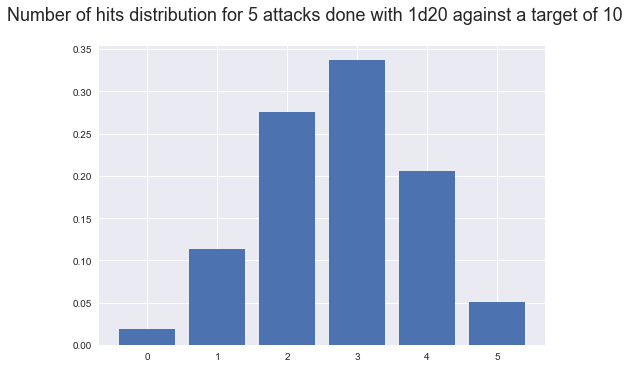

In [10]:
# ------------------------------------------- #
#  Aleatory variable examples                 #
# ------------------------------------------- #

av1 = AleatoryVariable.from_exact(5, (0, 20))
av1.plot("Exact AV centered at 5, with domain [0, 20]")

av2 = AleatoryVariable.from_dice(Dice(1, 20, +5, 1))
av2.plot("AV generated from 1d20+5@1")

av3 = AleatoryVariable.from_hit(Dice(1, 20, +5, 1), 12)
av3.plot("AV generated from 1d20+5@1 >= 12")



# ---- Operations
av2.set_domain_bounds(-10, 40)  # This extends the domain of av2 to prevent "clipping"
sub_example = av2 - av1
sub_example.plot()

sum_example = AleatoryVariable.from_dice(d2) + AleatoryVariable.from_dice(d3)
sum_example.plot(r"3d6+2 $\oplus$ 2d7+1")

pow_example = AleatoryVariable.from_dice(d2) ** 3
pow_example.plot(r"3d6 $\uparrow$ 3")

d3d6 = Dice(3, 6)
d3d6.plot()
d2d3 = Dice(2, 3)
d2d3.plot()
mul_example = AleatoryVariable.from_dice(Dice(3,6)) * AleatoryVariable.from_dice(Dice(2,3))
mul_example.plot(r"3d6 $\otimes$ 2d3")


mul_example_2 = AleatoryVariable.from_dice(Dice(1,6)) * AleatoryVariable.from_hit(Dice(1,20), 10)
mul_example_2.plot("Damage dealt by 1d6 with an attack of 1d20 against 10 defense")

pow_example_2 = AleatoryVariable.from_hit(Dice(1,20), 10) ** 5
pow_example_2.plot("Number of hits distribution for 5 attacks done with 1d20 against a target of 10")


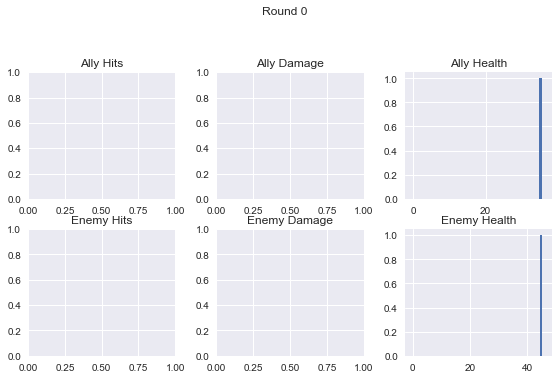

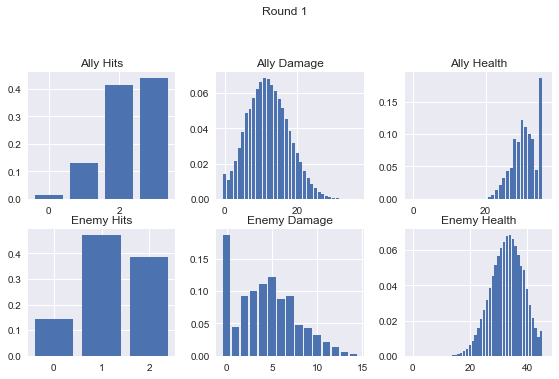

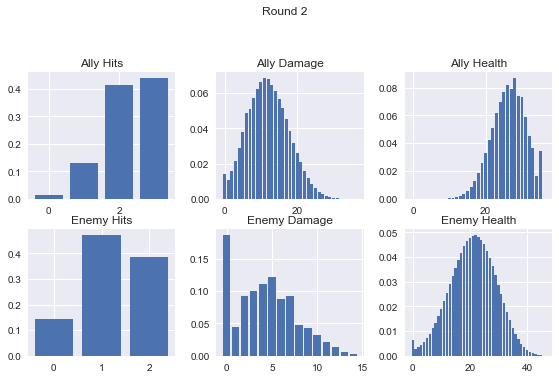

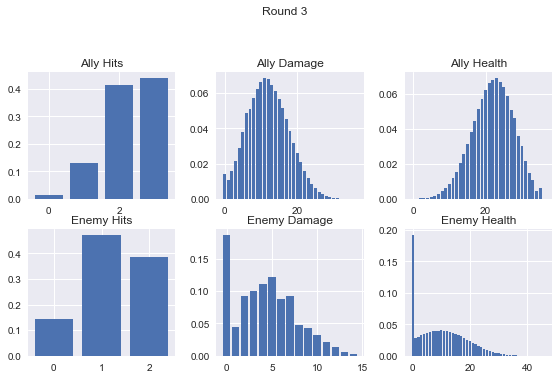

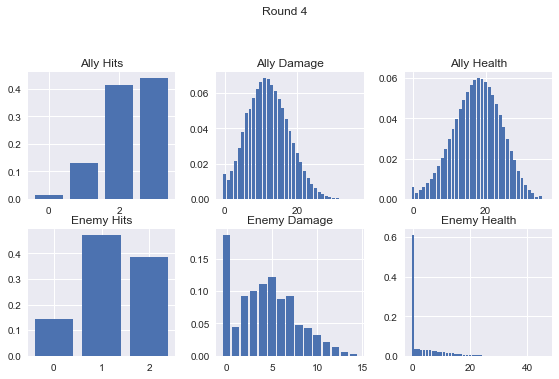

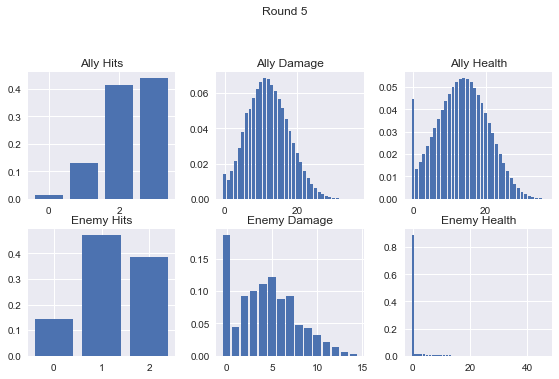

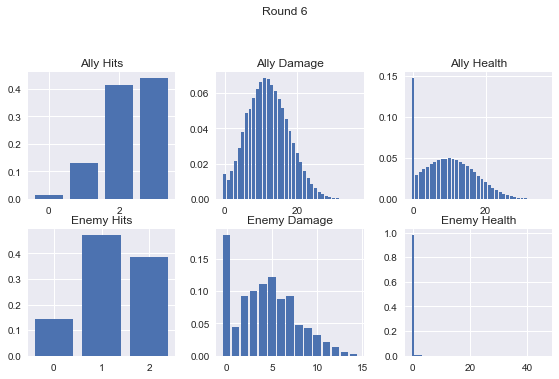

In [11]:
# ------------------------------------------- #
#  Combat outcome estimator                   #
# ------------------------------------------- #

# Lambdas for conciseness
fd = lambda *x : AleatoryVariable.from_dice(Dice(*x))
fe = lambda x, d=None: AleatoryVariable.from_exact(x, d)
fh = lambda t, *x: AleatoryVariable.from_hit(Dice(*x), t)

# Combat without evidence
combat = CombatModel(a_faction, b_faction, max_rounds=7)
combat.simulate()
combat.plot_combat_history()


-------------------------------------------
              WITH EVIDENCE                
-------------------------------------------



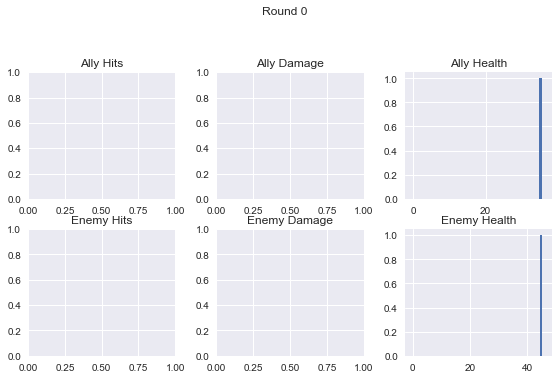

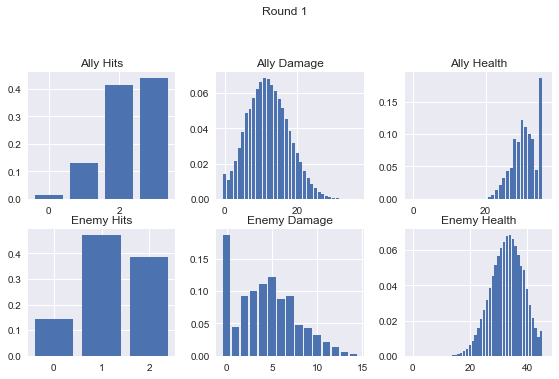

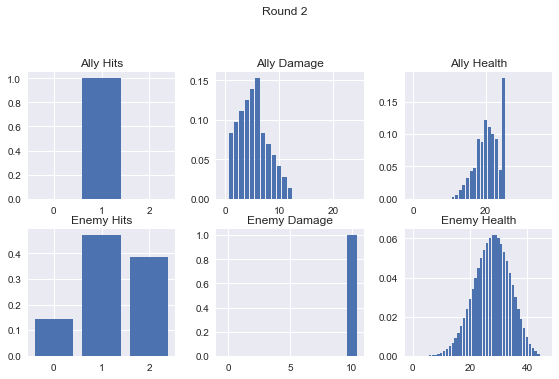

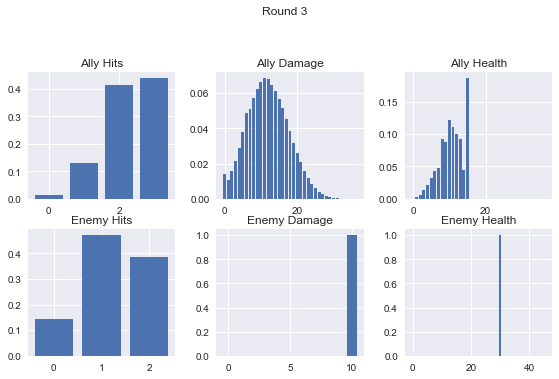

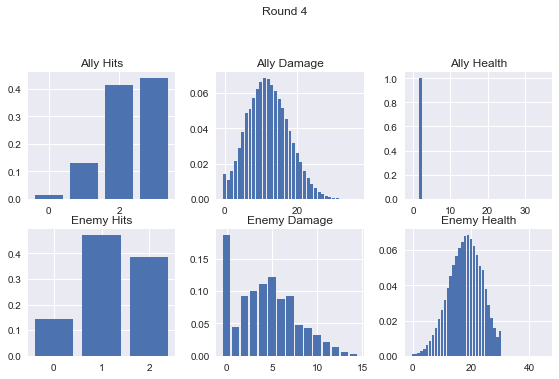

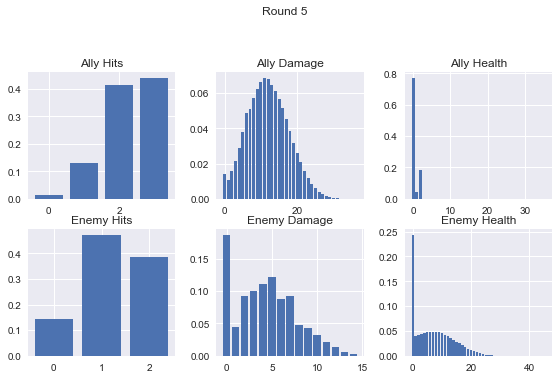

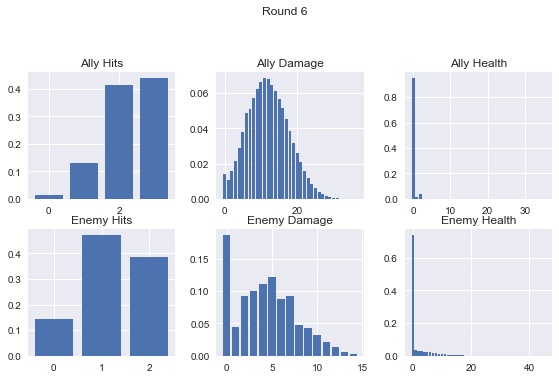

In [12]:
print()
print("-------------------------------------------")
print("              WITH EVIDENCE                ")
print("-------------------------------------------")
print()

# Combat with evidence
evidence = {
    2: RoundModel(a_hits=fe(1, (0, 2)), b_damage=fe(10, (0, 10))),
    3: RoundModel(b_hp=fe(30, (0, b_faction.health)), b_damage=fe(10, (0,10))),
    4: RoundModel(a_hp= fe(2, (0, a_faction.health)), )
}
combat = CombatModel(a_faction, b_faction, max_rounds=7)
combat.simulate(evidence)
combat.plot_combat_history()